In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import os

import matplotlib.pyplot as plt
import random
from PIL import Image

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.applications import VGG19

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [3]:
# {"username":"miguelgallego","key":"6a7a2546d0b0a5683db1abd67fc0380c"}
dataset_link = "https://www.kaggle.com/datasets/harishkumardatalab/food-image-classification-dataset"
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: miguelgallego
Your Kaggle Key: ··········


100%|██████████| 1.68G/1.68G [01:04<00:00, 28.1MB/s]


In [4]:
# Ruta de la carpeta principal del conjunto de datos
dataset_dir = "/content/food-image-classification-dataset/Food Classification dataset"

# Lista de carpetas dentro de la carpeta principal
subdirectories = os.listdir(dataset_dir)
print("Contenido de la carpeta principal:")
print(subdirectories)

Contenido de la carpeta principal:
['Baked Potato', 'Fries', 'Donut', 'dhokla', 'chai', 'kaathi_rolls', 'apple_pie', 'jalebi', 'pakode', 'sushi', 'Taco', 'fried_rice', 'chapati', 'samosa', 'paani_puri', 'burger', 'momos', 'chicken_curry', 'Sandwich', 'idli', 'chole_bhature', 'Hot Dog', 'pizza', 'kulfi', 'ice_cream', 'dal_makhani', 'pav_bhaji', 'butter_naan', 'Taquito', 'masala_dosa', 'kadai_paneer', 'cheesecake', 'omelette', 'Crispy Chicken']


In [5]:
# Lista de clases de alimentos
classes = subdirectories
classes[:3]

['Baked Potato', 'Fries', 'Donut']

In [6]:
# Directorio raíz del conjunto de datos
dataset_root = "/content/food-image-classification-dataset/Food Classification dataset"

# # Muestra ejemplos de imágenes de cada clase
# num_examples_per_class = 3
# for food_class in classes:
#     class_dir = os.path.join(dataset_root, food_class)
#     image_files = os.listdir(class_dir)
#     random.shuffle(image_files)  # Baraja las imágenes para mostrar ejemplos aleatorios
#     plt.figure(figsize=(12, 4))
#     for i in range(num_examples_per_class):
#         img_path = os.path.join(class_dir, image_files[i])
#         img = Image.open(img_path)
#         plt.subplot(1, num_examples_per_class, i + 1)
#         plt.imshow(img)
#         plt.title(food_class)
#     plt.show()


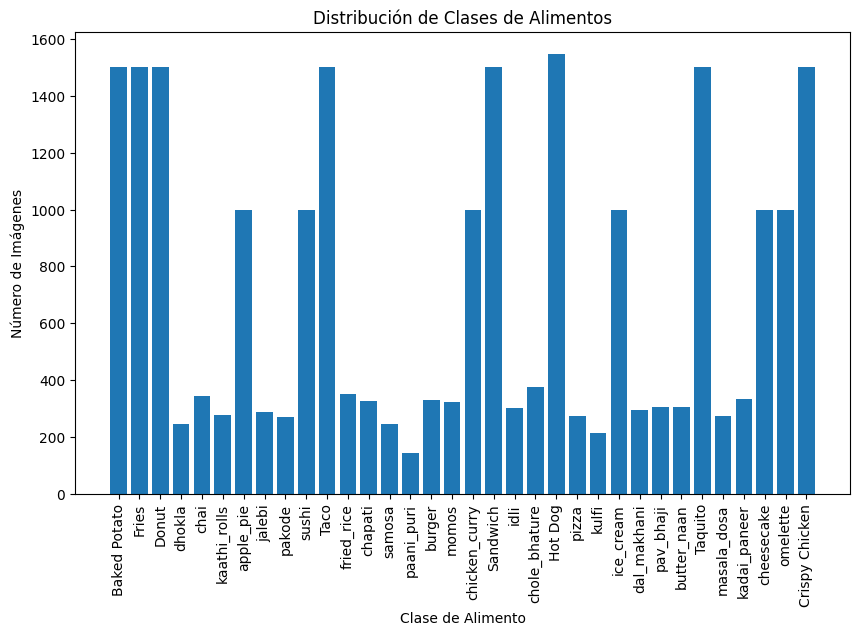


Número total de imágen: 23873


In [7]:
# Calcula el número de imágenes por clase
num_images_per_class = {food_class: len(os.listdir(os.path.join(dataset_root, food_class))) for food_class in classes}
# print(len(os.listdir(os.path.join(dataset_root, food_class)))for food_class in classes)

# Muestra la distribución de clases
plt.figure(figsize=(10, 6))
plt.bar(num_images_per_class.keys(), num_images_per_class.values())
plt.xlabel('Clase de Alimento')
plt.ylabel('Número de Imágenes')
plt.title('Distribución de Clases de Alimentos')
plt.xticks(rotation=90)
plt.show()

n_images = sum(num_images_per_class.values())
print(f"\nNúmero total de imágen: {n_images}")

In [8]:
# Obtiene las dimensiones de una imagen de muestra
random_class = random.choice(classes)
random_img = random.choice(os.listdir(os.path.join(dataset_root,random_class)))
sample_image_path = os.path.join(dataset_root, random_class, random_img)
sample_image = Image.open(sample_image_path)
image_width, image_height = sample_image.size
print(f"Ancho de imagen: {image_width}px, Alto de imagen: {image_height}px")


Ancho de imagen: 512px, Alto de imagen: 512px


In [9]:
# Redimensionado de las imágenes

target_size = (224, 224)  # Tamaño deseado de las imágenes

def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize(target_size, Image.LANCZOS)  # Redimensionar la imagen
    # Realizar otras transformaciones, como normalización de píxeles, aquí si es necesario
    return image



In [10]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rescale=1.0/255,        # Normalizar los valores de píxeles al rango [0, 1]
#     rotation_range=20,      # Rango de rotación aleatoria
#     width_shift_range=0.2,  # Desplazamiento horizontal aleatorio
#     height_shift_range=0.2, # Desplazamiento vertical aleatorio
#     shear_range=0.2,        # Distorsión de corte aleatoria
#     zoom_range=0.2,         # Ampliación aleatoria
#     horizontal_flip=True,   # Volteo horizontal aleatorio
#     fill_mode='nearest'     # Estrategia de relleno
# )

# batch_size = 32  # Tamaño del lote (batch size)

In [11]:
# Inicializa listas para almacenar las rutas de imágenes y etiquetas
image_paths = []
labels = []

# Itera a través de las carpetas de clases de alimentos
for food_class in subdirectories:
    class_dir = os.path.join(dataset_dir, food_class)
    if os.path.isdir(class_dir):
        # Enumera los archivos de imágenes en la carpeta de la clase
        class_image_paths = [os.path.join(class_dir, filename) for filename in os.listdir(class_dir)]
        # Agrega las rutas de imágenes a la lista
        image_paths.extend(class_image_paths)
        # Agrega las etiquetas correspondientes (nombre de la clase) a la lista
        labels.extend([food_class] * len(class_image_paths))

In [12]:
# %%time

# # Aplicar la función par cambiar el tamaño de las imágnes
# dic_imag_path = {im: preprocess_image(im) for im in image_paths}


In [13]:
# # Comprobar cómo quedan las imagnes despúes de remodelarlas
# n = random.randint(1, n_images)
# print(f"Label imagen: {labels[n]}")
# image_width, image_height = dic_imag_path[image_paths[n]].size
# print(f"Ancho de imagen: {image_width}px, Alto de imagen: {image_height}px")
# dic_imag_path[image_paths[n]]


In [14]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# # Crear generadores de datos para los conjuntos de entrenamiento y prueba
# train_generator = datagen.flow_from_directory(
#     directory=dataset_dir,
#     target_size=target_size,
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset='training'
# )

# test_generator = datagen.flow_from_directory(
#     directory=dataset_dir,
#     target_size=target_size,
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset='validation'
# )


In [15]:
#!apt-get install tree
# !tree -d

In [16]:
# Codificaión de las etiquetas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [17]:
label_encoder.classes_

array(['Baked Potato', 'Crispy Chicken', 'Donut', 'Fries', 'Hot Dog',
       'Sandwich', 'Taco', 'Taquito', 'apple_pie', 'burger',
       'butter_naan', 'chai', 'chapati', 'cheesecake', 'chicken_curry',
       'chole_bhature', 'dal_makhani', 'dhokla', 'fried_rice',
       'ice_cream', 'idli', 'jalebi', 'kaathi_rolls', 'kadai_paneer',
       'kulfi', 'masala_dosa', 'momos', 'omelette', 'paani_puri',
       'pakode', 'pav_bhaji', 'pizza', 'samosa', 'sushi'], dtype='<U14')

In [18]:
model = VGG19(weights='imagenet', include_top=False)
model.summary()

80134624/80134624 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [19]:
for layer in model.layers:
    layer.trainable = False

In [20]:
num_classes = 34  # Reemplaza con el número de clases en tu dataset

# Agrega una nueva capa de salida
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Capa oculta opcional
predictions = Dense(num_classes, activation='softmax')(x)  # Capa de salida

# Crea un nuevo modelo con la capa de salida modificada
new_model = Model(inputs=model.input, outputs=predictions)

In [21]:
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# Crear generadores de datos para entrenamiento y validación
batch_size = 32  # Tamaño del lote (batch size)

train_datagen = ImageDataGenerator(
    #preprocessing_function=preprocess_image,  # La función preprocess_image que definiste antes
    validation_split=0.2  # Porcentaje de datos para validación
)

train_generator = train_datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 19108 images belonging to 34 classes.
Found 4765 images belonging to 34 classes.


In [24]:
# Entrenar el modelo utilizando los generadores de datos
epochs = 10  # Número de épocas
history = new_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),  # Número total de lotes por época
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)  # Número total de lotes de validación por época
)


Epoch 1/10
 24/598 [>.............................] - ETA: 1:47 - loss: 6.4118 - accuracy: 0.1706

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


598/598 [==============================] - 170s 258ms/step - loss: 1.8412 - accuracy: 0.5364 - val_loss: 1.2156 - val_accuracy: 0.6424
Epoch 2/10
598/598 [==============================] - 168s 281ms/step - loss: 1.0273 - accuracy: 0.6982 - val_loss: 1.2017 - val_accuracy: 0.6472
Epoch 3/10
598/598 [==============================] - 158s 264ms/step - loss: 0.8007 - accuracy: 0.7551 - val_loss: 1.1876 - val_accuracy: 0.6678
Epoch 4/10
598/598 [==============================] - 153s 256ms/step - loss: 0.6407 - accuracy: 0.7979 - val_loss: 1.3194 - val_accuracy: 0.6558
Epoch 5/10
598/598 [==============================] - 152s 255ms/step - loss: 0.5260 - accuracy: 0.8309 - val_loss: 1.3404 - val_accuracy: 0.6711
Epoch 6/10
598/598 [==============================] - 150s 251ms/step - loss: 0.4259 - accuracy: 0.8612 - val_loss: 1.3467 - val_accuracy: 0.6703
Epoch 7/10
598/598 [==============================] - 151s 252ms/step - loss: 0.3526 - accuracy: 0.8831 - val_loss: 1.4915 - val_accura

In [34]:
new_model.save('firs_model_version.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
new_model.save('my_model.keras')

In [26]:
test_loss, test_accuracy = new_model.evaluate(validation_generator)
print(f"Pérdida en el conjunto de prueba: {test_loss}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")


149/149 [==============================] - 36s 240ms/step - loss: 1.8440 - accuracy: 0.6718
Pérdida en el conjunto de prueba: 1.8439831733703613
Precisión en el conjunto de prueba: 0.671773374080658
